# Module optimize in scipy
[Marjolein Heidotting, Barbara Paetsch; April 2020]

*Abstract*<br>
The optimize module in SciPy is a useful tool for finding local and global minimum and maximum values, curve fitting, and root finding in functions. This notebook contains two demos of two different functions in scipy.optimize, dealing with constraint and non-constraint one- and multivariable optimization problems.


## Introduction
SciPy optimize is a module that consist of different tools that can be used to optimize data. Its main functionalities are finding local and global minima and maxima, curve fitting, and root finding of functions. The functions that are used to find extreme values are similar to some modules in numpy, but numpy can only find the minimum of an array, or compare to other arrays, while optimize can look at functions.

One of the advantages of using the optimize module is that there are mutiple methods that can be used for optimization, and you can select which one you want to use. This is more important for non-linear problems.

The functionalities in optimize are so general that the number of applications is so big, that it can be applied in most physics problems. For example, when highly energetic particles travel through thin silicon, they deposit energy in a shape that looks like a Landau convoluted with a Gaussian. To determine the point where most energy is deposited, the function can be fitted to the data. Minimisation is also a useful tool when optimising parameters, for example in Computer Tomography (CT) reconstruction.


#### Demo 1:  One variable, non-constrained function
Find minimum of potential $V(x)=-e^{-(x-0.5)^2}$

In [119]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [120]:
def potential(x):
    return -np.exp(-(x-0.5)**2)

First we plot the function, just to get an idea what the minimum might be

In [121]:
x=np.arange(-2.,2.,0.1)

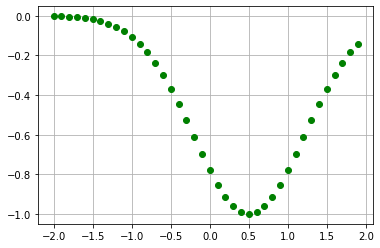

In [122]:
plt.plot(x,potential(x),'go')
plt.grid()

now we try out the scipy.optimize.minimize_scalar function

In [123]:
from scipy import optimize

In [124]:
optimize.minimize_scalar(potential)

     fun: -1.0
    nfev: 10
     nit: 6
 success: True
       x: 0.5000000058670102

but what if we have now more than one variable?

In [125]:
fminimum=optimize.minimize(potential,1)

In [126]:
fminimum

      fun: -0.9999999999957379
 hess_inv: array([[0.50046437]])
      jac: array([4.14252281e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([0.50000206])

In [127]:
def potential(x):
    return -np.exp(-(x[0]-x[1]-0.5)**2)

Plotting this function

In [128]:
x = np.arange(-0.5,0.5,0.001)
y = np.arange(-0.5,0.5,0.001)

In [129]:
xgrid, ygrid = np.meshgrid(x,y)

In [130]:
xy = np.stack([xgrid,ygrid])

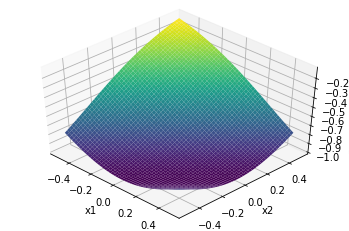

In [131]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, potential(xy), cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('potential(x1, x2)')
plt.show()

Setting initial values

In [132]:
init=[0,0]

In [133]:
fminimum=optimize.minimize(potential,init)

In [134]:
fminimum

      fun: -0.9999999999999976
 hess_inv: array([[0.62507533, 0.37492482],
       [0.37492482, 0.62507502]])
      jac: array([ 1.11758709e-07, -8.19563866e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 0.24999999, -0.25000006])

In [135]:
fminimum.x

array([ 0.24999999, -0.25000006])

### Demo 2: constrained optimization problems


we take the function $f(x_1,x_2)=x_1^2\cdot x_2$

with constrained conditions: $0<x_1<2$ and $-2<x_2<2$

In [136]:
f = lambda x: x[0]**2*x[1]
func = lambda x: -1*x[0]**2*x[1]

defining our bounds for $x_1$ and $x_2$. If there is no upper or lower limit "None", or "np.inf", "-np.inf"

In [137]:
bounds = ([0.,2.],[-2.,2.])

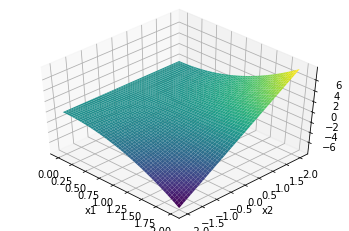

In [138]:
x = np.arange(0,2,0.001)
y = np.arange(-2,2,0.001)
xgrid, ygrid = np.meshgrid(x,y)
xy = np.stack([xgrid,ygrid])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, f(xy), cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

In [139]:
init = [0,0]

#### if we now also want the condition: $x + y = 3$

we add a linear condition to the constraints

constraints are always of the form: cons = [{"type":"ineq","fun": constr_fun},{...}]

whereas the constr_fun is of the form: constr_fun$\geq 0$ for type 'ineq' and $=0$ for 'eq'

In [140]:
lin_constraint = [{'type':'eq','fun': lambda x: x[0]+x[1]-3}]

result = optimize.minimize(function,initial point,constraints=lin_constraint,bounds=bounds)

In [141]:
result = optimize.minimize(func,init,constraints=lin_constraint,bounds=bounds)

In [142]:
print(result)

     fun: -4.0
     jac: array([-4., -4.])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([2., 1.])


In [143]:
maxiter = 1
result = optimize.minimize(func,init,constraints=lin_constraint,bounds=bounds,options={'maxiter':maxiter})

In [144]:
print(result)

     fun: -3.374999999999997
     jac: array([-4.5 , -2.25])
 message: 'Iteration limit exceeded'
    nfev: 8
     nit: 2
    njev: 2
  status: 9
 success: False
       x: array([1.5, 1.5])


## Conclusion

The SciPy optimize tool is a very general tool that is easily applicable in many situations, where a minimum, maximum, or the root of a function needs to be found. It can also be used in fitting functions to data points.